In [1]:
import disk_extraction as de

In [2]:
from astropy.io import fits
data = fits.getdata('/home/uasal-optics/Desktop/os9_hlc_muf/muf_os9_ccd_images_no_planets.fits').astype(float)
# cube = de.processcube(data,2,diskfile='ring_inc60_r0.5._HLC.fits')

# Targets With Disk

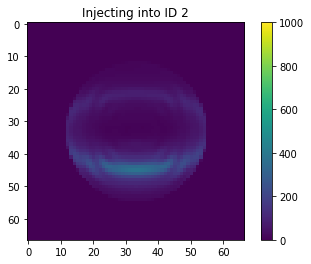

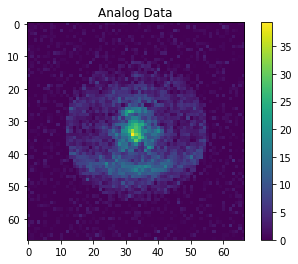

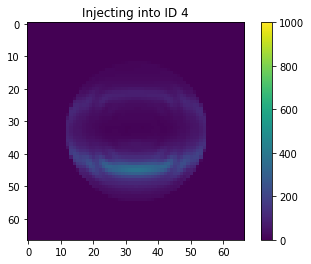

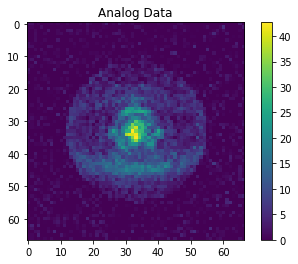

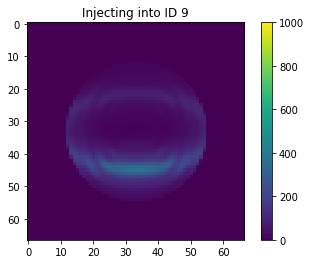

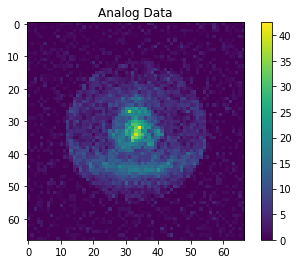

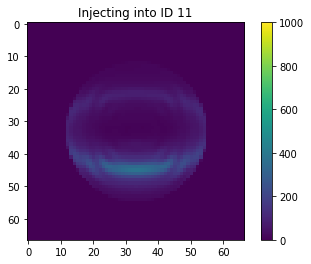

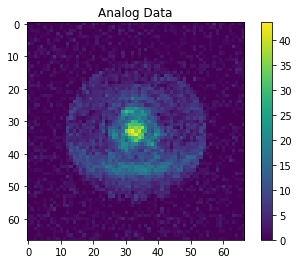

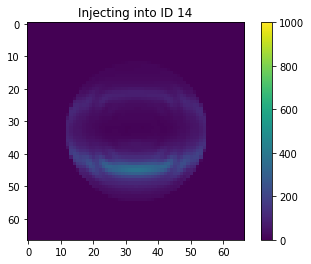

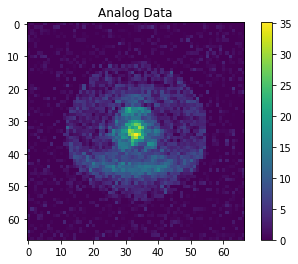

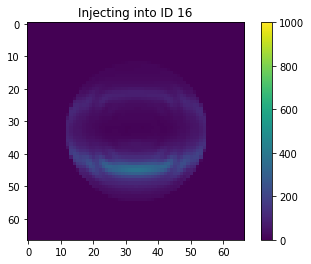

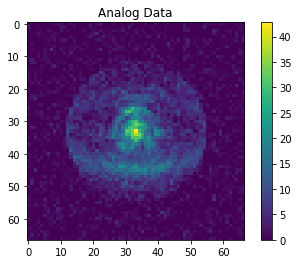

In [3]:
df = 'ring_inc60_r0.5._HLC.fits'
mode = 'Analog'
# -11 Deg
dataID2 = de.processcube(data,2,diskfile=df,mode=mode)
dataID4 = de.processcube(data,4,diskfile=df,mode=mode)
dataID9 = de.processcube(data,9,diskfile=df,mode=mode)
dataID11 = de.processcube(data,11,diskfile=df,mode=mode)
dataID14 = de.processcube(data,14,diskfile=df,mode=mode)
dataID16 = de.processcube(data,16,diskfile=df,mode=mode)

## References w/o Disk

In [4]:
dataID1 = de.processcube(data,1,diskfile=None)
dataID6 = de.processcube(data,6,diskfile=None)
dataID7 = de.processcube(data,7,diskfile=None)
dataID12 = de.processcube(data,12,diskfile=None)
dataID13 = de.processcube(data,13,diskfile=None)
dataID18 = de.processcube(data,18,diskfile=None)

In [6]:
import nmf_imaging
import numpy as np

# Component box
refbox = np.zeros([334,67,67])
refbox[0:59] = dataID1
refbox[60:124] = dataID6
refbox[125:184] = dataID7
refbox[185:249] = dataID12
refbox[250:309] = dataID13
refbox[310:335] = dataID18

# Pretty sure this means you are missing a row
refbox[refbox==0] = 1e-12

# Create a Mask
mask = np.zeros([67,67])+1e-12
x = np.linspace(-1,1,67)
y = x
x,y = np.meshgrid(x,y)
r = np.sqrt(x**2 + y**2)
mask[r <= 0.75] = 1
mask[r < 0.2] = 1e-12

# components = nmf_imaging.NMFcomponents(refbox,mask=mask,oneByOne=True,maxiters=1e5)

In [7]:
# # Write Components
# hdu = fits.PrimaryHDU(data=components)
# hdul = fits.HDUList([hdu])
# hdul.writeto('OS9comps_rewrite.fits')

components = fits.getdata('OS9comps_rewrite.fits')

In [8]:
# -11 Target NMF Box
m11box_disk = np.zeros([6,67,67])
m11box_disk[0] = dataID2
m11box_disk[1] = dataID4
m11box_disk[2] = dataID9
m11box_disk[3] = dataID11
m11box_disk[4] = dataID14
m11box_disk[5] = dataID16

# m11box_disk *= 1e5

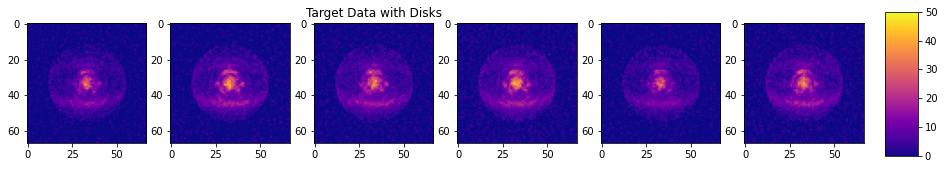

In [9]:
import matplotlib.pyplot as plt
vmin = 0
vmax = 50
fig,ax = plt.subplots(ncols=6,nrows=1,figsize=[15,5])
plt.set_cmap('plasma')
ax[2].set_title('Target Data with Disks')
ax[0].imshow(m11box_disk[0],vmin=vmin,vmax=vmax)
ax[1].imshow(m11box_disk[1],vmin=vmin,vmax=vmax)
ax[2].imshow(m11box_disk[2],vmin=vmin,vmax=vmax)
ax[3].imshow(m11box_disk[3],vmin=vmin,vmax=vmax)
ax[4].imshow(m11box_disk[4],vmin=vmin,vmax=vmax)
cmap = ax[5].imshow(m11box_disk[5],vmin=vmin,vmax=vmax)
cbax = fig.add_axes([0.92,0.3,0.03,0.4])
# ax[0,0].set_ylabel('-11 Target Data')
# ax[1,0].imshow(p11box_disk[0],vmin=vmin,vmax=vmax)
# ax[1,1].imshow(p11box_disk[1],vmin=vmin,vmax=vmax)
# ax[1,2].imshow(p11box_disk[2],vmin=vmin,vmax=vmax)
# ax[1,3].imshow(p11box_disk[3],vmin=vmin,vmax=vmax)
# ax[1,4].imshow(p11box_disk[4],vmin=vmin,vmax=vmax)
# ax[1,5].imshow(p11box_disk[5],vmin=vmin,vmax=vmax)
# ax[1,0].set_ylabel('+11 Target Data')
cb = plt.colorbar(cmap,cax=cbax)

In [10]:
def NMFSub(data,components,mask=None,cube=False):
    # Use around 1/3 of available components
    numcomps = 100
    
    # Preallocate 
    resultbox = np.zeros(components.shape)
    for i in range(data.shape[0]):
        trg = data[i]
        
        model = nmf_imaging.NMFmodelling(trg=trg,
                                        components=components,
                                        n_components=numcomps,
                                        maxiters=1e2,
                                        mask_components=mask,
                                        cube=cube)
        
        for l in range(numcomps):
            best_frac = nmf_imaging.NMFbff(trg,model[l])
            resultbox[l,:,:] += nmf_imaging.NMFsubtraction(trg,model[l],frac=best_frac)[0]
            
    return resultbox

In [11]:
m11box_disk[m11box_disk <= 0] = 1e-12
m11box_disk[m11box_disk == np.nan] = 1e-12
m11box_disk[m11box_disk == np.inf] = 1e-12

components[components <= 0] = 1e-12
components[components == np.nan] = 1e-12
components[components == np.inf] = 1e-12

m11_nmf = NMFSub(m11box_disk,components,mask=None,cube=True)

Building models one by one...
	1 of 100
Current Chi2=2.1022, Previous Chi2=2.1212, Change=0.8933% @ niters=0
Took 0.000 minutes to reach current solution.
	2 of 100
Current Chi2=2.0932, Previous Chi2=2.1207, Change=1.2936% @ niters=0
Took 0.000 minutes to reach current solution.
	3 of 100
Current Chi2=2.0909, Previous Chi2=2.1202, Change=1.3821% @ niters=0
Took 0.000 minutes to reach current solution.
	4 of 100
Current Chi2=2.0790, Previous Chi2=2.1193, Change=1.9038% @ niters=0
Took 0.000 minutes to reach current solution.
	5 of 100
Current Chi2=2.0735, Previous Chi2=2.1192, Change=2.1574% @ niters=0
Took 0.000 minutes to reach current solution.
	6 of 100
Current Chi2=2.0717, Previous Chi2=2.1186, Change=2.2163% @ niters=0
Took 0.000 minutes to reach current solution.
	7 of 100
Current Chi2=2.0601, Previous Chi2=2.1170, Change=2.6880% @ niters=0
Took 0.000 minutes to reach current solution.
	8 of 100
Current Chi2=2.0613, Previous Chi2=2.1185, Change=2.6978% @ niters=0
Took 0.000 minut

	42 of 100
Current Chi2=1.2502, Previous Chi2=2.0387, Change=38.6755% @ niters=0
Current Chi2=1.1747, Previous Chi2=1.1750, Change=0.0288% @ niters=20
Current Chi2=1.1714, Previous Chi2=1.1715, Change=0.0074% @ niters=40
Current Chi2=1.1704, Previous Chi2=1.1704, Change=0.0027% @ niters=60
Took 0.001 minutes to reach current solution.
	43 of 100
Current Chi2=1.2709, Previous Chi2=2.0490, Change=37.9736% @ niters=0
Current Chi2=1.1750, Previous Chi2=1.1755, Change=0.0367% @ niters=20
Current Chi2=1.1708, Previous Chi2=1.1709, Change=0.0110% @ niters=40
Current Chi2=1.1693, Previous Chi2=1.1694, Change=0.0026% @ niters=60
Took 0.000 minutes to reach current solution.
	44 of 100
Current Chi2=1.2304, Previous Chi2=2.0243, Change=39.2159% @ niters=0
Current Chi2=1.1694, Previous Chi2=1.1697, Change=0.0294% @ niters=20
Current Chi2=1.1668, Previous Chi2=1.1668, Change=0.0031% @ niters=40
Took 0.000 minutes to reach current solution.
	45 of 100
Current Chi2=1.2770, Previous Chi2=2.0383, Chang

Current Chi2=0.7611, Previous Chi2=0.7612, Change=0.0122% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	61 of 100
Current Chi2=1.2089, Previous Chi2=1.9978, Change=39.4872% @ niters=0
Current Chi2=1.1451, Previous Chi2=1.1456, Change=0.0498% @ niters=20
Current Chi2=1.0367, Previous Chi2=1.0736, Change=3.4412% @ niters=40
Current Chi2=0.7631, Previous Chi2=0.7634, Change=0.0300% @ niters=60
Current Chi2=0.7606, Previous Chi2=0.7606, Change=0.0101% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	62 of 100
Current Chi2=1.2046, Previous Chi2=2.0051, Change=39.9233% @ niters=0
Current Chi2=1.1394, Previous Chi2=1.1400, Change=0.0581% @ niters=20
Current Chi2=1.0531, Previous Chi2=1.0828, Change=2.7418% @ niters=40
Current Chi2=0.7638, Previous Chi2=0.7641, Change=0.0325% @ niters=60
Current Chi2=0.7613, Previous Chi2=0.7614, Change=0.0124% @ niters

Current Chi2=1.1707, Previous Chi2=1.9197, Change=39.0159% @ niters=0
Current Chi2=1.1211, Previous Chi2=1.1218, Change=0.0660% @ niters=20
Current Chi2=1.0907, Previous Chi2=1.0990, Change=0.7543% @ niters=40
Current Chi2=0.7612, Previous Chi2=0.7616, Change=0.0614% @ niters=60
Current Chi2=0.7571, Previous Chi2=0.7572, Change=0.0198% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	79 of 100
Current Chi2=1.1502, Previous Chi2=1.9150, Change=39.9379% @ niters=0
Current Chi2=1.1057, Previous Chi2=1.1061, Change=0.0368% @ niters=20
Current Chi2=1.0956, Previous Chi2=1.0982, Change=0.2317% @ niters=40
Current Chi2=0.7616, Previous Chi2=0.7624, Change=0.1068% @ niters=60
Current Chi2=0.7573, Previous Chi2=0.7575, Change=0.0167% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	80 of 100
Current Chi2=1.1778, Previous Chi2=1.9425, Change=39.3650% @ niter

Current Chi2=0.7573, Previous Chi2=0.7574, Change=0.0178% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	96 of 100
Current Chi2=1.1563, Previous Chi2=1.8752, Change=38.3378% @ niters=0
Current Chi2=1.1108, Previous Chi2=1.1116, Change=0.0690% @ niters=20
Current Chi2=1.0961, Previous Chi2=1.0987, Change=0.2302% @ niters=40
Current Chi2=0.7620, Previous Chi2=0.7629, Change=0.1182% @ niters=60
Current Chi2=0.7573, Previous Chi2=0.7574, Change=0.0185% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	97 of 100
Current Chi2=1.1540, Previous Chi2=1.8213, Change=36.6412% @ niters=0
Current Chi2=1.1080, Previous Chi2=1.1087, Change=0.0660% @ niters=20
Current Chi2=1.0948, Previous Chi2=1.0970, Change=0.2051% @ niters=40
Current Chi2=0.7623, Previous Chi2=0.7632, Change=0.1137% @ niters=60
Current Chi2=0.7577, Previous Chi2=0.7579, Change=0.0256% @ niters

/home/uasal-optics/src/package/nmf_imaging.py:463: RuntimeWarning: invalid value encountered in less
  data_slice[data_slice < np.nanmedian(data_slice) - 3*np.nanstd(data_slice)] = np.nan # Modified from -10 on 2018/07/12
/home/uasal-optics/src/package/nmf_imaging.py:460: RuntimeWarning: invalid value encountered in greater
  if np.nansum(data_slice > np.nanmedian(data_slice) + 3*np.nanstd(data_slice)) == 0 or np.nansum(data_slice < np.nanmedian(data_slice) -3*np.nanstd(data_slice)) == 0: # Modified from -10 on 2018/07/12
/home/uasal-optics/src/package/nmf_imaging.py:460: RuntimeWarning: invalid value encountered in less
  if np.nansum(data_slice > np.nanmedian(data_slice) + 3*np.nanstd(data_slice)) == 0 or np.nansum(data_slice < np.nanmedian(data_slice) -3*np.nanstd(data_slice)) == 0: # Modified from -10 on 2018/07/12
/home/uasal-optics/src/package/nmf_imaging.py:462: RuntimeWarning: invalid value encountered in greater
  data_slice[data_slice > np.nanmedian(data_slice) + 3*np.nanstd(

Building models one by one...
	1 of 100
Current Chi2=2.6919, Previous Chi2=2.7182, Change=0.9678% @ niters=0
Took 0.000 minutes to reach current solution.
	2 of 100
Current Chi2=2.6811, Previous Chi2=2.7179, Change=1.3534% @ niters=0
Took 0.000 minutes to reach current solution.
	3 of 100
Current Chi2=2.6607, Previous Chi2=2.7183, Change=2.1185% @ niters=0
Took 0.000 minutes to reach current solution.
	4 of 100
Current Chi2=2.6576, Previous Chi2=2.7171, Change=2.1882% @ niters=0
Took 0.000 minutes to reach current solution.
	5 of 100
Current Chi2=2.6517, Previous Chi2=2.7168, Change=2.3960% @ niters=0
Took 0.000 minutes to reach current solution.
	6 of 100
Current Chi2=2.6390, Previous Chi2=2.7165, Change=2.8518% @ niters=0
Took 0.000 minutes to reach current solution.
	7 of 100
Current Chi2=2.6260, Previous Chi2=2.7158, Change=3.3064% @ niters=0
Took 0.000 minutes to reach current solution.
	8 of 100
Current Chi2=2.6270, Previous Chi2=2.7156, Change=3.2600% @ niters=0
Took 0.000 minut

Current Chi2=1.4735, Previous Chi2=1.4739, Change=0.0300% @ niters=20
Current Chi2=1.4684, Previous Chi2=1.4686, Change=0.0104% @ niters=40
Current Chi2=1.4659, Previous Chi2=1.4660, Change=0.0072% @ niters=60
Current Chi2=1.4643, Previous Chi2=1.4643, Change=0.0042% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	43 of 100
Current Chi2=1.5392, Previous Chi2=2.6084, Change=40.9898% @ niters=0
Current Chi2=1.4692, Previous Chi2=1.4699, Change=0.0482% @ niters=20
Current Chi2=1.4622, Previous Chi2=1.4623, Change=0.0099% @ niters=40
Current Chi2=1.4609, Previous Chi2=1.4610, Change=0.0016% @ niters=60
Took 0.000 minutes to reach current solution.
	44 of 100
Current Chi2=1.5427, Previous Chi2=2.6260, Change=41.2516% @ niters=0
Current Chi2=1.4642, Previous Chi2=1.4649, Change=0.0442% @ niters=20
Current Chi2=1.4593, Previous Chi2=1.4594, Change=0.0051% @ niters=40
Took 0.000 minutes to reach current solution.
	45 of 100

Current Chi2=1.0049, Previous Chi2=1.0052, Change=0.0237% @ niters=60
Current Chi2=1.0022, Previous Chi2=1.0023, Change=0.0068% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	61 of 100
Current Chi2=1.4838, Previous Chi2=2.5893, Change=42.6942% @ niters=0
Current Chi2=1.4301, Previous Chi2=1.4309, Change=0.0569% @ niters=20
Current Chi2=1.2384, Previous Chi2=1.2939, Change=4.2944% @ niters=40
Current Chi2=1.0045, Previous Chi2=1.0047, Change=0.0229% @ niters=60
Current Chi2=1.0025, Previous Chi2=1.0025, Change=0.0044% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.000 minutes to reach current solution.
	62 of 100
Current Chi2=1.4895, Previous Chi2=2.5539, Change=41.6779% @ niters=0
Current Chi2=1.4211, Previous Chi2=1.4218, Change=0.0480% @ niters=20
Current Chi2=1.3228, Previous Chi2=1.3565, Change=2.4809% @ niters=40
Current Chi2=1.0045, Previous Chi2=1.0048, Change=0.0254% @ niters

Current Chi2=1.3950, Previous Chi2=1.3957, Change=0.0526% @ niters=20
Current Chi2=1.3728, Previous Chi2=1.3786, Change=0.4222% @ niters=40
Current Chi2=1.0015, Previous Chi2=1.0020, Change=0.0488% @ niters=60
Current Chi2=0.9972, Previous Chi2=0.9974, Change=0.0128% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	79 of 100
Current Chi2=1.4369, Previous Chi2=2.4899, Change=42.2895% @ niters=0
Current Chi2=1.3947, Previous Chi2=1.3954, Change=0.0536% @ niters=20
Current Chi2=1.3714, Previous Chi2=1.3775, Change=0.4460% @ niters=40
Current Chi2=1.0013, Previous Chi2=1.0017, Change=0.0492% @ niters=60
Current Chi2=0.9970, Previous Chi2=0.9971, Change=0.0127% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	80 of 100
Current Chi2=1.4534, Previous Chi2=2.5003, Change=41.8699% @ niters=0
Current Chi2=1.3981, Previous Chi2=1.3989, Change=0.0583% @ niters

Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	96 of 100
Current Chi2=1.4458, Previous Chi2=2.4508, Change=41.0069% @ niters=0
Current Chi2=1.3920, Previous Chi2=1.3929, Change=0.0647% @ niters=20
Current Chi2=1.3699, Previous Chi2=1.3748, Change=0.3588% @ niters=40
Current Chi2=1.0004, Previous Chi2=1.0010, Change=0.0562% @ niters=60
Current Chi2=0.9957, Previous Chi2=0.9958, Change=0.0140% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	97 of 100
Current Chi2=1.4397, Previous Chi2=2.4263, Change=40.6648% @ niters=0
Current Chi2=1.3905, Previous Chi2=1.3913, Change=0.0538% @ niters=20
Current Chi2=1.3739, Previous Chi2=1.3770, Change=0.2237% @ niters=40
Current Chi2=1.0004, Previous Chi2=1.0012, Change=0.0748% @ niters=60
Current Chi2=0.9952, Previous Chi2=0.9953, Change=0.0137% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0

Current Chi2=1.5568, Previous Chi2=1.5573, Change=0.0311% @ niters=20
Current Chi2=1.5527, Previous Chi2=1.5528, Change=0.0071% @ niters=40
Current Chi2=1.5515, Previous Chi2=1.5515, Change=0.0018% @ niters=60
Took 0.000 minutes to reach current solution.
	36 of 100
Current Chi2=1.6301, Previous Chi2=2.6917, Change=39.4386% @ niters=0
Current Chi2=1.5518, Previous Chi2=1.5520, Change=0.0114% @ niters=20
Current Chi2=1.5506, Previous Chi2=1.5506, Change=0.0012% @ niters=40
Took 0.000 minutes to reach current solution.
	37 of 100
Current Chi2=1.6408, Previous Chi2=2.7155, Change=39.5778% @ niters=0
Current Chi2=1.5516, Previous Chi2=1.5520, Change=0.0300% @ niters=20
Current Chi2=1.5472, Previous Chi2=1.5473, Change=0.0070% @ niters=40
Current Chi2=1.5462, Previous Chi2=1.5462, Change=0.0014% @ niters=60
Took 0.001 minutes to reach current solution.
	38 of 100
Current Chi2=1.6575, Previous Chi2=2.6988, Change=38.5822% @ niters=0
Current Chi2=1.5581, Previous Chi2=1.5589, Change=0.0507% @

Current Chi2=1.0558, Previous Chi2=1.0939, Change=3.4818% @ niters=40
Current Chi2=1.0009, Previous Chi2=1.0011, Change=0.0200% @ niters=60
Current Chi2=0.9992, Previous Chi2=0.9992, Change=0.0040% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	57 of 100
Current Chi2=1.5677, Previous Chi2=2.6552, Change=40.9551% @ niters=0
Current Chi2=1.4925, Previous Chi2=1.4934, Change=0.0607% @ niters=20
Current Chi2=1.1882, Previous Chi2=1.2669, Change=6.2092% @ niters=40
Current Chi2=1.0013, Previous Chi2=1.0015, Change=0.0251% @ niters=60
Current Chi2=0.9989, Previous Chi2=0.9989, Change=0.0059% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	58 of 100
Current Chi2=1.5430, Previous Chi2=2.6400, Change=41.5550% @ niters=0
Current Chi2=1.4760, Previous Chi2=1.4765, Change=0.0379% @ niters=20
Current Chi2=1.0660, Previous Chi2=1.1105, Change=4.0024% @ niters

Took 0.001 minutes to reach current solution.
	74 of 100
Current Chi2=1.5217, Previous Chi2=2.5928, Change=41.3098% @ niters=0
Current Chi2=1.4536, Previous Chi2=1.4546, Change=0.0721% @ niters=20
Current Chi2=1.0984, Previous Chi2=1.1565, Change=5.0263% @ niters=40
Current Chi2=0.9925, Previous Chi2=0.9927, Change=0.0197% @ niters=60
Current Chi2=0.9901, Previous Chi2=0.9901, Change=0.0071% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	75 of 100
Current Chi2=1.5004, Previous Chi2=2.5670, Change=41.5477% @ niters=0
Current Chi2=1.4420, Previous Chi2=1.4429, Change=0.0608% @ niters=20
Current Chi2=1.1711, Previous Chi2=1.2395, Change=5.5119% @ niters=40
Current Chi2=0.9898, Previous Chi2=0.9899, Change=0.0189% @ niters=60
Current Chi2=0.9871, Previous Chi2=0.9872, Change=0.0080% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	76 of 100
Current C

Current Chi2=0.9850, Previous Chi2=0.9852, Change=0.0217% @ niters=60
Current Chi2=0.9824, Previous Chi2=0.9825, Change=0.0065% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	92 of 100
Current Chi2=1.4887, Previous Chi2=2.5001, Change=40.4553% @ niters=0
Current Chi2=1.4342, Previous Chi2=1.4351, Change=0.0618% @ niters=20
Current Chi2=1.2357, Previous Chi2=1.2972, Change=4.7399% @ niters=40
Current Chi2=0.9858, Previous Chi2=0.9861, Change=0.0260% @ niters=60
Current Chi2=0.9827, Previous Chi2=0.9828, Change=0.0076% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	93 of 100
Current Chi2=1.4872, Previous Chi2=2.5284, Change=41.1803% @ niters=0
Current Chi2=1.4294, Previous Chi2=1.4303, Change=0.0686% @ niters=20
Current Chi2=1.2886, Previous Chi2=1.3362, Change=3.5598% @ niters=40
Current Chi2=0.9854, Previous Chi2=0.9857, Change=0.0333% @ niters

Took 0.000 minutes to reach current solution.
	26 of 100
Current Chi2=1.9319, Previous Chi2=3.0478, Change=36.6144% @ niters=0
Current Chi2=1.8417, Previous Chi2=1.8418, Change=0.0057% @ niters=20
Took 0.000 minutes to reach current solution.
	27 of 100
Current Chi2=2.0314, Previous Chi2=3.0519, Change=33.4393% @ niters=0
Current Chi2=1.8441, Previous Chi2=1.8447, Change=0.0308% @ niters=20
Current Chi2=1.8413, Previous Chi2=1.8413, Change=0.0009% @ niters=40
Took 0.000 minutes to reach current solution.
	28 of 100
Current Chi2=1.9255, Previous Chi2=3.0471, Change=36.8106% @ niters=0
Current Chi2=1.8418, Previous Chi2=1.8419, Change=0.0059% @ niters=20
Took 0.000 minutes to reach current solution.
	29 of 100
Current Chi2=1.9428, Previous Chi2=3.0340, Change=35.9644% @ niters=0
Current Chi2=1.8186, Previous Chi2=1.8193, Change=0.0426% @ niters=20
Current Chi2=1.8135, Previous Chi2=1.8136, Change=0.0029% @ niters=40
Took 0.000 minutes to reach current solution.
	30 of 100
Current Chi2=1.

Took 0.002 minutes to reach current solution.
	51 of 100
Current Chi2=1.8071, Previous Chi2=2.9804, Change=39.3683% @ niters=0
Current Chi2=1.6971, Previous Chi2=1.6984, Change=0.0766% @ niters=20
Current Chi2=1.0986, Previous Chi2=1.0993, Change=0.0660% @ niters=40
Current Chi2=1.0943, Previous Chi2=1.0944, Change=0.0099% @ niters=60
Current Chi2=1.0930, Previous Chi2=1.0930, Change=0.0029% @ niters=80
Took 0.001 minutes to reach current solution.
	52 of 100
Current Chi2=1.7774, Previous Chi2=2.9726, Change=40.2062% @ niters=0
Current Chi2=1.6854, Previous Chi2=1.6860, Change=0.0400% @ niters=20
Current Chi2=1.0968, Previous Chi2=1.0975, Change=0.0599% @ niters=40
Current Chi2=1.0934, Previous Chi2=1.0935, Change=0.0074% @ niters=60
Current Chi2=1.0923, Previous Chi2=1.0923, Change=0.0035% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	53 of 100
Current Chi2=1.7610, Previous Chi2=2.9461, Change=40.2248% @ niters=0

Current Chi2=1.0804, Previous Chi2=1.0805, Change=0.0048% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	69 of 100
Current Chi2=1.7292, Previous Chi2=2.9479, Change=41.3410% @ niters=0
Current Chi2=1.6420, Previous Chi2=1.6428, Change=0.0455% @ niters=20
Current Chi2=1.0897, Previous Chi2=1.0921, Change=0.2175% @ niters=40
Current Chi2=1.0828, Previous Chi2=1.0830, Change=0.0162% @ niters=60
Current Chi2=1.0807, Previous Chi2=1.0807, Change=0.0055% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	70 of 100
Current Chi2=1.7434, Previous Chi2=2.9036, Change=39.9565% @ niters=0
Current Chi2=1.6484, Previous Chi2=1.6494, Change=0.0574% @ niters=20
Current Chi2=1.1142, Previous Chi2=1.1408, Change=2.3309% @ niters=40
Current Chi2=1.0827, Previous Chi2=1.0828, Change=0.0148% @ niters=60
Current Chi2=1.0805, Previous Chi2=1.0805, Change=0.0072% @ niters

Current Chi2=1.6290, Previous Chi2=1.6302, Change=0.0746% @ niters=20
Current Chi2=1.0896, Previous Chi2=1.0983, Change=0.7971% @ niters=40
Current Chi2=1.0753, Previous Chi2=1.0755, Change=0.0167% @ niters=60
Current Chi2=1.0731, Previous Chi2=1.0732, Change=0.0064% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	87 of 100
Current Chi2=1.6967, Previous Chi2=2.8803, Change=41.0930% @ niters=0
Current Chi2=1.6242, Previous Chi2=1.6252, Change=0.0602% @ niters=20
Current Chi2=1.0867, Previous Chi2=1.0923, Change=0.5123% @ niters=40
Current Chi2=1.0759, Previous Chi2=1.0761, Change=0.0176% @ niters=60
Current Chi2=1.0736, Previous Chi2=1.0736, Change=0.0071% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	88 of 100
Current Chi2=1.6888, Previous Chi2=2.8479, Change=40.7013% @ niters=0
Current Chi2=1.6195, Previous Chi2=1.6204, Change=0.0592% @ niters

	11 of 100
Current Chi2=2.0256, Previous Chi2=2.1056, Change=3.7992% @ niters=0
Took 0.000 minutes to reach current solution.
	12 of 100
Current Chi2=2.0096, Previous Chi2=2.1033, Change=4.4551% @ niters=0
Took 0.000 minutes to reach current solution.
	13 of 100
Current Chi2=2.0120, Previous Chi2=2.1031, Change=4.3299% @ niters=0
Took 0.000 minutes to reach current solution.
	14 of 100
Current Chi2=1.5893, Previous Chi2=2.0949, Change=24.1374% @ niters=0
Took 0.000 minutes to reach current solution.
	15 of 100
Current Chi2=1.6445, Previous Chi2=2.1005, Change=21.7098% @ niters=0
Current Chi2=1.5377, Previous Chi2=1.5377, Change=0.0013% @ niters=20
Took 0.000 minutes to reach current solution.
	16 of 100
Current Chi2=1.6884, Previous Chi2=2.0981, Change=19.5299% @ niters=0
Current Chi2=1.5376, Previous Chi2=1.5376, Change=0.0014% @ niters=20
Took 0.000 minutes to reach current solution.
	17 of 100
Current Chi2=1.6084, Previous Chi2=2.0930, Change=23.1533% @ niters=0
Took 0.000 minutes t

Current Chi2=0.8753, Previous Chi2=0.9345, Change=6.3368% @ niters=40
Current Chi2=0.7474, Previous Chi2=0.7476, Change=0.0225% @ niters=60
Current Chi2=0.7453, Previous Chi2=0.7454, Change=0.0063% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	47 of 100
Current Chi2=1.2182, Previous Chi2=2.0215, Change=39.7377% @ niters=0
Current Chi2=1.1623, Previous Chi2=1.1629, Change=0.0527% @ niters=20
Current Chi2=0.9702, Previous Chi2=1.0304, Change=5.8415% @ niters=40
Current Chi2=0.7466, Previous Chi2=0.7468, Change=0.0248% @ niters=60
Current Chi2=0.7444, Previous Chi2=0.7444, Change=0.0091% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	48 of 100
Current Chi2=1.2140, Previous Chi2=2.0123, Change=39.6702% @ niters=0
Current Chi2=1.1608, Previous Chi2=1.1611, Change=0.0254% @ niters=20
Current Chi2=0.9332, Previous Chi2=0.9967, Change=6.3712% @ niters

Took 0.001 minutes to reach current solution.
	64 of 100
Current Chi2=1.1621, Previous Chi2=1.9356, Change=39.9587% @ niters=0
Current Chi2=1.1224, Previous Chi2=1.1228, Change=0.0329% @ niters=20
Current Chi2=1.0227, Previous Chi2=1.0577, Change=3.3136% @ niters=40
Current Chi2=0.7448, Previous Chi2=0.7451, Change=0.0352% @ niters=60
Current Chi2=0.7419, Previous Chi2=0.7420, Change=0.0144% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	65 of 100
Current Chi2=1.1815, Previous Chi2=1.9562, Change=39.5993% @ niters=0
Current Chi2=1.1259, Previous Chi2=1.1267, Change=0.0695% @ niters=20
Current Chi2=1.0011, Previous Chi2=1.0411, Change=3.8380% @ niters=40
Current Chi2=0.7448, Previous Chi2=0.7450, Change=0.0313% @ niters=60
Current Chi2=0.7420, Previous Chi2=0.7420, Change=0.0126% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	66 of 100
Current C

Current Chi2=1.0720, Previous Chi2=1.0819, Change=0.9172% @ niters=40
Current Chi2=0.7407, Previous Chi2=0.7411, Change=0.0490% @ niters=60
Current Chi2=0.7376, Previous Chi2=0.7377, Change=0.0130% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	82 of 100
Current Chi2=1.1421, Previous Chi2=1.8803, Change=39.2618% @ niters=0
Current Chi2=1.1014, Previous Chi2=1.1020, Change=0.0555% @ niters=20
Current Chi2=1.0773, Previous Chi2=1.0843, Change=0.6466% @ niters=40
Current Chi2=0.7414, Previous Chi2=0.7418, Change=0.0576% @ niters=60
Current Chi2=0.7378, Previous Chi2=0.7379, Change=0.0135% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	83 of 100
Current Chi2=1.1585, Previous Chi2=1.9204, Change=39.6725% @ niters=0
Current Chi2=1.1060, Previous Chi2=1.1067, Change=0.0563% @ niters=20
Current Chi2=1.0507, Previous Chi2=1.0693, Change=1.7417% @ niters

Took 0.001 minutes to reach current solution.
	99 of 100
Current Chi2=1.1341, Previous Chi2=1.8178, Change=37.6074% @ niters=0
Current Chi2=1.0927, Previous Chi2=1.0934, Change=0.0622% @ niters=20
Current Chi2=1.0568, Previous Chi2=1.0679, Change=1.0414% @ niters=40
Current Chi2=0.7364, Previous Chi2=0.7367, Change=0.0455% @ niters=60
Current Chi2=0.7332, Previous Chi2=0.7333, Change=0.0130% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	100 of 100
Current Chi2=1.1314, Previous Chi2=1.8473, Change=38.7526% @ niters=0
Current Chi2=1.0925, Previous Chi2=1.0931, Change=0.0572% @ niters=20
Current Chi2=1.0716, Previous Chi2=1.0771, Change=0.5152% @ niters=40
Current Chi2=0.7363, Previous Chi2=0.7368, Change=0.0683% @ niters=60
Current Chi2=0.7327, Previous Chi2=0.7328, Change=0.0142% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
Building models one

	39 of 100
Current Chi2=1.7161, Previous Chi2=2.8303, Change=39.3665% @ niters=0
Current Chi2=1.6161, Previous Chi2=1.6165, Change=0.0242% @ niters=20
Current Chi2=1.6139, Previous Chi2=1.6139, Change=0.0014% @ niters=40
Took 0.000 minutes to reach current solution.
	40 of 100
Current Chi2=1.6791, Previous Chi2=2.8319, Change=40.7060% @ niters=0
Current Chi2=1.6164, Previous Chi2=1.6167, Change=0.0189% @ niters=20
Current Chi2=1.6140, Previous Chi2=1.6140, Change=0.0024% @ niters=40
Took 0.000 minutes to reach current solution.
	41 of 100
Current Chi2=1.7220, Previous Chi2=2.8347, Change=39.2513% @ niters=0
Current Chi2=1.6252, Previous Chi2=1.6264, Change=0.0709% @ niters=20
Current Chi2=1.6145, Previous Chi2=1.6146, Change=0.0090% @ niters=40
Current Chi2=1.6134, Previous Chi2=1.6135, Change=0.0010% @ niters=60
Took 0.000 minutes to reach current solution.
	42 of 100
Current Chi2=1.7018, Previous Chi2=2.8256, Change=39.7737% @ niters=0
Current Chi2=1.6112, Previous Chi2=1.6117, Chang

Current Chi2=1.0344, Previous Chi2=1.0345, Change=0.0129% @ niters=60
Current Chi2=1.0325, Previous Chi2=1.0325, Change=0.0060% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	59 of 100
Current Chi2=1.6716, Previous Chi2=2.8070, Change=40.4469% @ niters=0
Current Chi2=1.5586, Previous Chi2=1.5597, Change=0.0711% @ niters=20
Current Chi2=1.0485, Previous Chi2=1.0581, Change=0.9035% @ niters=40
Current Chi2=1.0337, Previous Chi2=1.0339, Change=0.0125% @ niters=60
Current Chi2=1.0322, Previous Chi2=1.0322, Change=0.0041% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	60 of 100
Current Chi2=1.6286, Previous Chi2=2.7586, Change=40.9628% @ niters=0
Current Chi2=1.5534, Previous Chi2=1.5540, Change=0.0428% @ niters=20
Current Chi2=1.0512, Previous Chi2=1.0635, Change=1.1550% @ niters=40
Current Chi2=1.0336, Previous Chi2=1.0338, Change=0.0131% @ niters

	76 of 100
Current Chi2=1.5769, Previous Chi2=2.6942, Change=41.4688% @ niters=0
Current Chi2=1.5151, Previous Chi2=1.5160, Change=0.0620% @ niters=20
Current Chi2=1.0808, Previous Chi2=1.1231, Change=3.7681% @ niters=40
Current Chi2=1.0203, Previous Chi2=1.0205, Change=0.0184% @ niters=60
Current Chi2=1.0177, Previous Chi2=1.0178, Change=0.0081% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	77 of 100
Current Chi2=1.5600, Previous Chi2=2.6939, Change=42.0908% @ niters=0
Current Chi2=1.5113, Previous Chi2=1.5120, Change=0.0439% @ niters=20
Current Chi2=1.1148, Previous Chi2=1.1735, Change=5.0066% @ niters=40
Current Chi2=1.0213, Previous Chi2=1.0215, Change=0.0201% @ niters=60
Current Chi2=1.0187, Previous Chi2=1.0188, Change=0.0083% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	78 of 100
Current Chi2=1.5732, Previous Chi2=2.7214, Change=42.18

Current Chi2=1.0100, Previous Chi2=1.0101, Change=0.0092% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	94 of 100
Current Chi2=1.5762, Previous Chi2=2.6743, Change=41.0599% @ niters=0
Current Chi2=1.5072, Previous Chi2=1.5083, Change=0.0681% @ niters=20
Current Chi2=1.1251, Previous Chi2=1.1896, Change=5.4205% @ niters=40
Current Chi2=1.0136, Previous Chi2=1.0139, Change=0.0257% @ niters=60
Current Chi2=1.0103, Previous Chi2=1.0104, Change=0.0115% @ niters=80
Iteration in re-initialization reaches maximum number = 100
Took 0.001 minutes to reach current solution.
	95 of 100
Current Chi2=1.5663, Previous Chi2=2.6112, Change=40.0151% @ niters=0
Current Chi2=1.5029, Previous Chi2=1.5039, Change=0.0688% @ niters=20
Current Chi2=1.1359, Previous Chi2=1.2039, Change=5.6474% @ niters=40
Current Chi2=1.0129, Previous Chi2=1.0132, Change=0.0232% @ niters=60
Current Chi2=1.0099, Previous Chi2=1.0100, Change=0.0093% @ niters

In [12]:
M11 = m11_nmf[0:99]

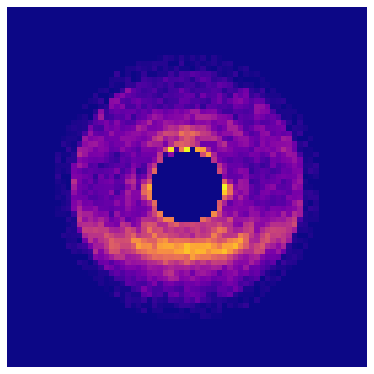

In [13]:
# Create Component Movie
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
matplotlib.rcParams['animation.embed_limit'] = 2*32
total_number_of_frames = M11.shape[0]
# mask[mask == 0] = np.nan
all_data = M11*mask
# print(all_data.shape)
# all_data = all_data[0]
# print(all_data.shape)

def animate(frame):
    global all_data,image
    image.set_array(all_data[frame])
    return image

fig,ax = plt.subplots(1,figsize=[5,5])
fig.subplots_adjust(0,0,1,1)
ax.axis("off")
image = ax.imshow(all_data[0],vmin=0)

ani = FuncAnimation(fig,animate,np.arange(total_number_of_frames-1),fargs=[],interval=30)
Writer = animation.PillowWriter
writer = Writer(fps=15,metadata=dict(artist='Jaren'),bitrate=1800)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [14]:
ani.save('brightdisk_analog2.gif',writer=writer)